# **8차시: 결측치 처리**
## 🔍 **학습목표**
- 결측치가 있는 데이터를 탐색하고, 상황에 맞게 적절한 방법으로 처리할 수 있다.

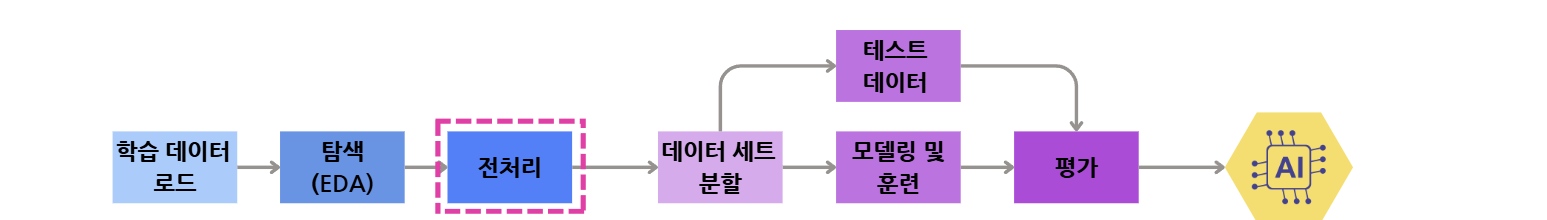

In [2]:
import pandas as pd
df = pd.read_csv('데이터세트/온라인쇼핑몰_배송완료예측.csv')

In [3]:
df.head()

,주문ID,배송완료여부,고객등급,고객명,성별,나이,동시주문상품수,쿠폰사용횟수,주문번호,결제금액,배송지코드,주문채널
0,1,0,3,이지훈,남성,22.0,1,0,ORD2024-000001,7000,NaN,웹
1,2,1,1,정하영,여성,38.0,1,0,ORD2024-000002,71000,SEO-850,모바일
2,3,1,3,최민수,여성,26.0,0,0,ORD2024-000003,8000,NaN,웹
3,4,1,1,이도윤,여성,35.0,1,0,ORD2024-000004,53000,BS-743,웹
4,5,0,3,이채원,남성,35.0,0,0,ORD2024-000005,8000,NaN,웹


---


## 📌 **핵심 이론 정리**

- **결측치(Missing Value)**: 데이터가 존재해야 할 위치에 값이 없는 상태
- 분석 전 반드시 탐색하고 처리 필요


## **1.결측치 탐색**
- `df.isnull()` : 결측치 여부 확인 (True/False)
- `df.isnull().sum()` : 컬럼별 결측치 개수 확인
- `df.info()` : 결측치가 있는 컬럼은 non-null 값 수가 적게 표시됨

In [3]:
df.isnull()

,주문ID,배송완료여부,고객등급,고객명,성별,나이,동시주문상품수,쿠폰사용횟수,주문번호,결제금액,배송지코드,주문채널
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
주문ID,0
배송완료여부,0
고객등급,0
고객명,0
성별,0
나이,177
동시주문상품수,0
쿠폰사용횟수,0
주문번호,0
결제금액,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   주문ID     891 non-null    object 
 1   배송완료여부   891 non-null    int64  
 2   고객등급     891 non-null    int64  
 3   고객명      891 non-null    object 
 4   성별       891 non-null    object 
 5   나이       714 non-null    float64
 6   동시주문상품수  891 non-null    int64  
 7   쿠폰사용횟수   891 non-null    int64  
 8   주문번호     891 non-null    object 
 9   결제금액     891 non-null    int64  
 10  배송지코드    204 non-null    object 
 11  주문채널     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


## **2.결측치 처리 방법**
- **삭제**
  - `df.dropna()` : 결측치 포함된 행 제거
  - `df.dropna(axis=1)` : 결측치 포함된 열 제거
  - `df.drop([컬럼명],axis=1)`: 결측치 포함된 특정 열 제거

- **대치**
  - 수치형 → 평균/중앙값 대치:
    -  `df['컬럼명'].fillna(df['컬럼명'].mean())`
    -  `df['컬럼명'].fillna(df['컬럼명'].median())`
  - 범주형 → 최빈값 대치: `df['컬럼명'].fillna(df['컬럼명'].mode()[0])`



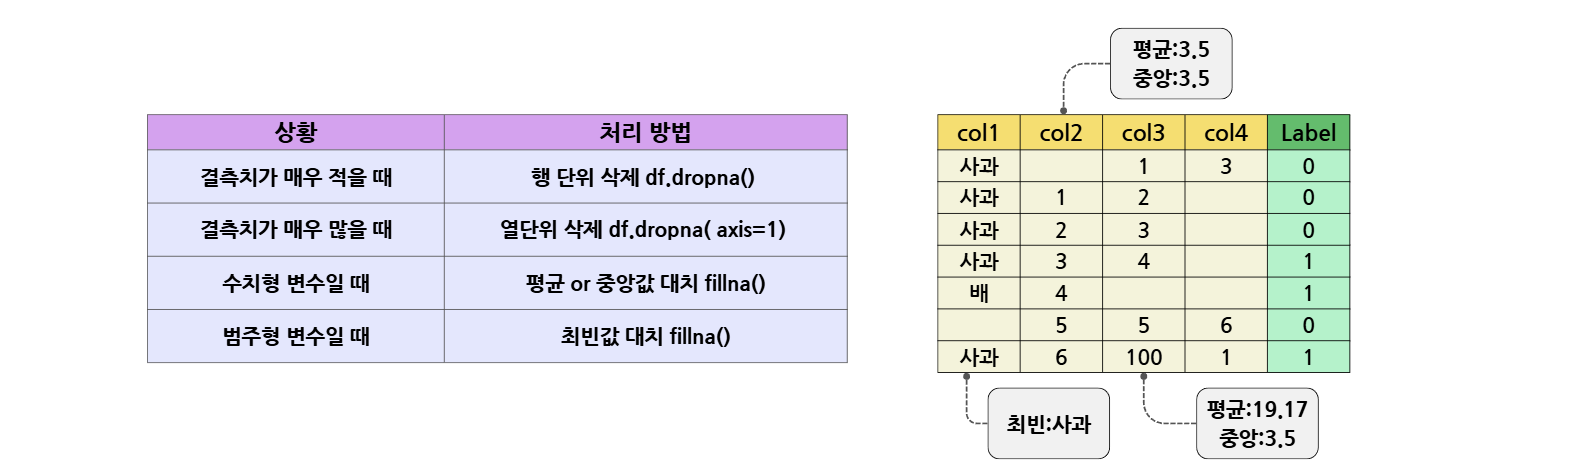

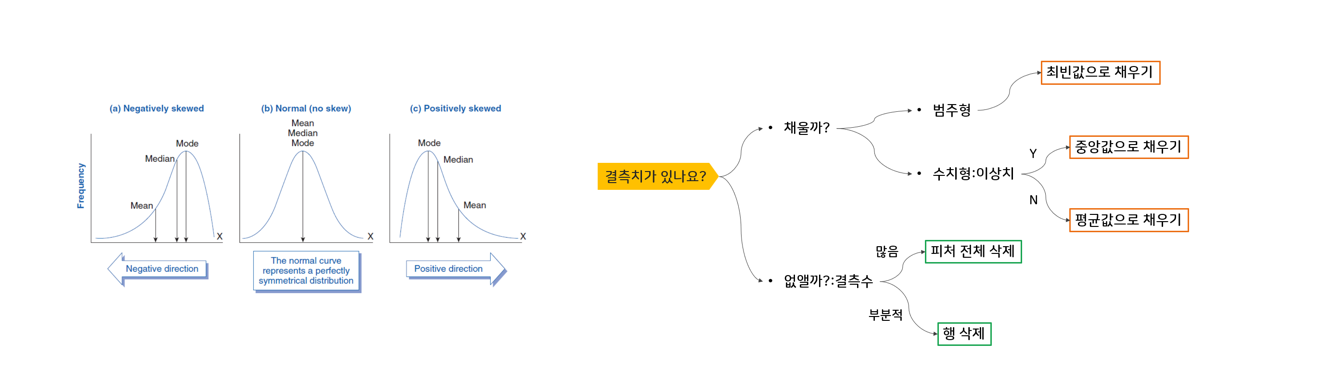

## **3.결측치 삭제**

In [5]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('데이터세트/온라인쇼핑몰_배송완료예측.csv')

# 결측치 개수 확인
print(df.isnull().sum())
df.info()

주문ID         0
배송완료여부       0
고객등급         0
고객명          0
성별           0
나이         177
동시주문상품수      0
쿠폰사용횟수       0
주문번호         0
결제금액         0
배송지코드      687
주문채널         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   주문ID     891 non-null    object 
 1   배송완료여부   891 non-null    int64  
 2   고객등급     891 non-null    int64  
 3   고객명      891 non-null    object 
 4   성별       891 non-null    object 
 5   나이       714 non-null    float64
 6   동시주문상품수  891 non-null    int64  
 7   쿠폰사용횟수   891 non-null    int64  
 8   주문번호     891 non-null    object 
 9   결제금액     891 non-null    int64  
 10  배송지코드    204 non-null    object 
 11  주문채널     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


In [6]:
# 결측치가 하나라도 있는 컬럼은 삭제
df_1 = df.dropna(axis=1)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   주문ID     891 non-null    object
 1   배송완료여부   891 non-null    int64 
 2   고객등급     891 non-null    int64 
 3   고객명      891 non-null    object
 4   성별       891 non-null    object
 5   동시주문상품수  891 non-null    int64 
 6   쿠폰사용횟수   891 non-null    int64 
 7   주문번호     891 non-null    object
 8   결제금액     891 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 62.8+ KB


In [7]:
# 결측치가 있는 행은 삭제
df_2 = df.dropna()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   주문ID     183 non-null    object 
 1   배송완료여부   183 non-null    int64  
 2   고객등급     183 non-null    int64  
 3   고객명      183 non-null    object 
 4   성별       183 non-null    object 
 5   나이       183 non-null    float64
 6   동시주문상품수  183 non-null    int64  
 7   쿠폰사용횟수   183 non-null    int64  
 8   주문번호     183 non-null    object 
 9   결제금액     183 non-null    int64  
 10  배송지코드    183 non-null    object 
 11  주문채널     183 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 18.6+ KB


In [ ]:
# 결측치가 많은 '배송지코드'만 삭제

df.drop('배송지코드',axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   주문ID     891 non-null    object 
 1   배송완료여부   891 non-null    int64  
 2   고객등급     891 non-null    int64  
 3   고객명      891 non-null    object 
 4   성별       891 non-null    object 
 5   나이       714 non-null    float64
 6   동시주문상품수  891 non-null    int64  
 7   쿠폰사용횟수   891 non-null    int64  
 8   주문번호     891 non-null    object 
 9   결제금액     891 non-null    int64  
 10  주문채널     889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


## **4.결측치 대치**

In [8]:
test_df = df.copy()

test_df['배송지코드'].mode()[0]

'BS-175'

In [9]:
# 어떻게 모은 데이터인데 삭제는 못해!
#'배송지코드'를 최빈값으로 채워넣음.
cp_df = df.copy()

#채워넣는 값
rep_value = cp_df['배송지코드'].mode()[0]

cp_df['배송지코드'] = cp_df['배송지코드'].fillna(rep_value)
cp_df.isnull().sum()
cp_df

,주문ID,배송완료여부,고객등급,고객명,성별,나이,동시주문상품수,쿠폰사용횟수,주문번호,결제금액,배송지코드,주문채널
0,1,0,3,이지훈,남성,22.0,1,0,ORD2024-000001,7000,BS-175,웹
1,2,1,1,정하영,여성,38.0,1,0,ORD2024-000002,71000,SEO-850,모바일
2,3,1,3,최민수,여성,26.0,0,0,ORD2024-000003,8000,BS-175,웹
3,4,1,1,이도윤,여성,35.0,1,0,ORD2024-000004,53000,BS-743,웹
4,5,0,3,이채원,남성,35.0,0,0,ORD2024-000005,8000,BS-175,웹
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,조지아,남성,27.0,0,0,ORD2024-000887,13000,BS-175,웹
887,888,1,1,김예린,여성,19.0,0,0,ORD2024-000888,30000,GG-616,웹
888,889,0,3,윤수빈,여성,NaN,1,2,ORD2024-000889,23000,BS-175,웹
889,890,1,1,김현우,남성,26.0,0,0,ORD2024-000890,30000,GG-882,모바일


In [9]:
# '나이'를 평균값으로 채워넣음.

#채워넣는 값
rep_value = cp_df['나이'].mean()

cp_df['나이'] = cp_df['나이'].fillna(rep_value)
cp_df.isnull().sum()

,0
주문ID,0
배송완료여부,0
고객등급,0
고객명,0
성별,0
나이,0
동시주문상품수,0
쿠폰사용횟수,0
주문번호,0
결제금액,0


---

## **연습 문제**

### **문제 1. 결측치 개수를 확인하세요.**

- 대상 데이터프레임: `df`
- 컬럼별 결측치 개수를 확인하는 코드를 작성하세요.

In [11]:
# 여기에 코드를 작성하세요.
import pandas as pd
df.isnull().sum()

주문ID         0
배송완료여부       0
고객등급         0
고객명          0
성별           0
나이         177
동시주문상품수      0
쿠폰사용횟수       0
주문번호         0
결제금액         0
배송지코드      687
주문채널         2
dtype: int64

### **문제 2. df의 전체 결측치 개수를 확인하세요.**

- 대상 데이터프레임: `df`
- 데이터프레임에 있는 전체 결측치를 계산하여 출력하시오.

In [13]:
# 여기에 코드를 작성하세요
print(df.isnull().sum().sum())

866


## **도전 문제**

### **문제 1.'배송지코드' 결측치 발생 원인 분석**
`온라인쇼핑몰_배송완료예측.csv` 파일에서 `'배송지코드'` 컬럼에 **많은 결측치**가 존재합니다.  
결측치는 보통 무작위가 아니라, **특정 조건에서 집중적으로 발생**하는 경우가 많습니다.

다음 조건에 따라 `'배송지코드'` 결측치가 **어떤 조건에서 발생하는지 탐색**하세요.

- 대상 데이터프레임: `df`
- `'배송지코드'`가 결측인 행만 추출하고 `null_df` 변수에 저장하세요.
- 이후 `null_df`에서 **'고객등급'** 또는 **'주문채널'** 컬럼과의 연관성을 탐색하세요.
    - `df[컬럼].value_counts()` 등을 활용해 어떤 값에서 결측치가 주로 발생하는지 확인하세요.




In [34]:
# 여기에 코드를 작성하세요
import pandas as pd
import numpy as np

df=pd.read_csv('데이터세트/온라인쇼핑몰_배송완료예측.csv')

cond = df['배송지코드'].isnull()
null_df = df[cond]


In [35]:
print(null_df['고객등급'].value_counts())
print(null_df['주문채널'].value_counts())

고객등급
3    479
2    168
1     40
Name: count, dtype: int64
주문채널
웹      515
모바일     99
전화      73
Name: count, dtype: int64


### **문제 2.결측치 발생 원인 해석**
다음 보기 중 `'배송지코드'` 결측치 발생과 **가장 관련이 높은 해석**을 고르세요.  
(예: `답안02 = 2`)

1. 배송지코드 결측치는 1등급 고객에서 주로 발생하였다.  
2. 배송지코드 결측치는 주문채널이 웹인 경우에 집중되어 있다.  
3. 배송지코드 결측치는 무작위로 발생하였으며 특정 패턴이 없다.  
4. 배송지코드 결측치는 주문채널 중 전화의 경우 더 많이 발생하였다.


In [ ]:
# 여기에 코드를 작성하세요
